<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [8]:
# Assuming 'data' is your DataFrame
Y = data['Class'].to_numpy()


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [9]:
# Create the StandardScaler object
transform = preprocessing.StandardScaler()

# Use the fit_transform method to standardize the data and assign it back to X
X = transform.fit_transform(X)


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [10]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


we can see we only have 18 test samples.


In [11]:
Y_test.shape

(18,)

## TASK  4 >>> LOGISTIC REGRESSION


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [12]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
# Create a GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
logreg_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [13]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [14]:
best_params = logreg_cv.best_params_  # Get the best parameters

# Create a new Logistic Regression model with the best hyperparameters
lr_best = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'])

# Fit the new model to your training data
lr_best.fit(X_train, Y_train)

# Calculate the accuracy on the test data
test_accuracylg = lr_best.score(X_test, Y_test)

# Print the test accuracy
print("Test accuracy for Logistic Regression:", test_accuracylg)


Test accuracy for Logistic Regression: 0.8333333333333334


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [15]:
# Calculate the accuracy on the test data
test_accuracylg = logreg_cv.score(X_test, Y_test)

# Print the test accuracy
print("Test accuracy for  Logistic Regression:", test_accuracylg)

Test accuracy for  Logistic Regression: 0.8333333333333334


Lets look at the confusion matrix:


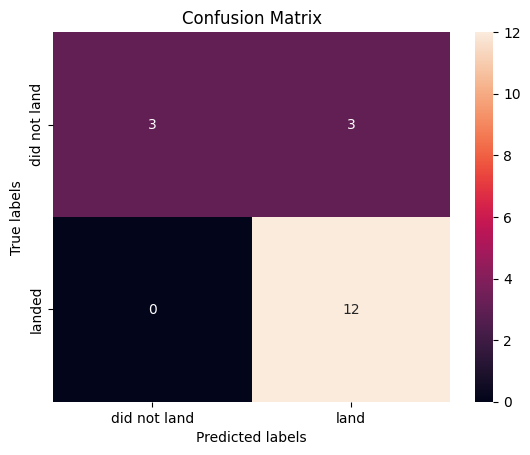

In [16]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [17]:
def matrix2(y, y_predict):
    "This function prints the confusion matrix as text"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    return cm


In [18]:
# Predict on the test data
Y_pred = logreg_cv.predict(X_test)

# Calculate the confusion matrix
confusion_matrix_result_lg = matrix2(Y_test, Y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix_result_lg)

Confusion Matrix:
[[ 3  3]
 [ 0 12]]


Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6 >>> SVM


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [19]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [20]:
# Create a GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [21]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [22]:
# Create an SVM model with the best hyperparameters
best_params = svm_cv.best_params_  # Get the best parameters
svm_best = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

# Fit the model to your training data
svm_best.fit(X_train, Y_train)

# Calculate the accuracy on the test data
svm_test_accuracy = svm_best.score(X_test, Y_test)

# Print the test accuracy
print("SVM Test accuracy:", svm_test_accuracy)


SVM Test accuracy: 0.8333333333333334


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [23]:
# Calculate the accuracy on the test data
svm_test_accuracy = svm_cv.score(X_test, Y_test)
# Print the test accuracy
print("SVM Test accuracy:", svm_test_accuracy)


SVM Test accuracy: 0.8333333333333334


We can plot the confusion matrix


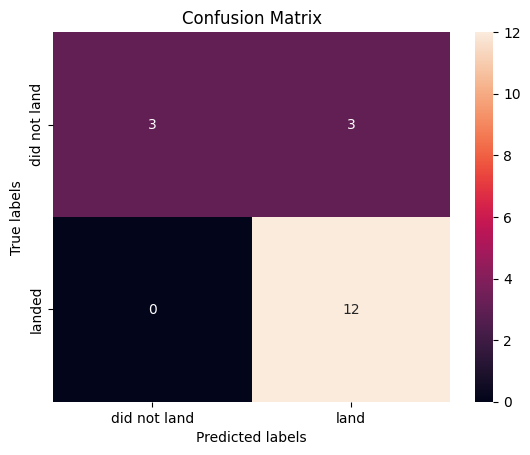

In [24]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [25]:
# Predict on the test data
svm_Y_pred = svm_cv.predict(X_test)

# Calculate the confusion matrix using the matrix2 function
svm_confusion_matrix_result = matrix2(Y_test, svm_Y_pred)

# Print the confusion matrix
print("SVM Confusion Matrix:")
print(svm_confusion_matrix_result)

SVM Confusion Matrix:
[[ 3  3]
 [ 0 12]]


In [26]:
import warnings

# Suppress all warnings (not recommended for production code)
warnings.filterwarnings("ignore")


## TASK  8  >>> DECISION TREE GRID SEARCH CV


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [27]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [28]:
# Create a GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [29]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8892857142857142


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [30]:
# Calculate the accuracy on the test data
tree_test_accuracy = tree_cv.score(X_test, Y_test)

# Print the test accuracy
print("Decision Tree Test accuracy:", tree_test_accuracy)

Decision Tree Test accuracy: 0.8333333333333334


We can plot the confusion matrix


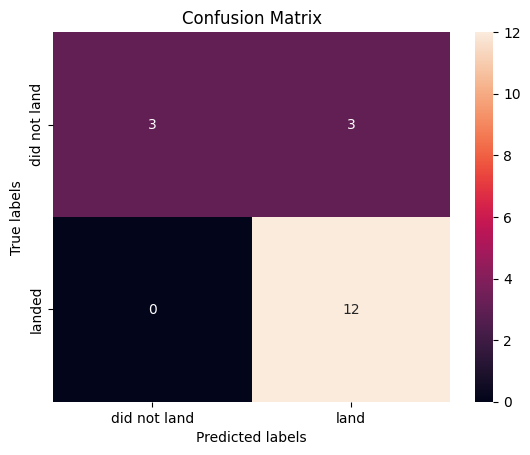

In [31]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [32]:
# Predict on the test data
tree_Y_pred = tree_cv.predict(X_test)

# Calculate the confusion matrix using the matrix2 function
tree_confusion_matrix_result = matrix2(Y_test, tree_Y_pred)

# Print the confusion matrix
print("Decision Tree Confusion Matrix:")
print(tree_confusion_matrix_result)


Decision Tree Confusion Matrix:
[[ 3  3]
 [ 0 12]]


## TASK  10 >>> KNN


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [33]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [34]:
# Create a GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [35]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [36]:
# Calculate the accuracy on the test data
knn_test_accuracy = knn_cv.score(X_test, Y_test)

# Print the test accuracy
print("KNN Test accuracy:", knn_test_accuracy)

KNN Test accuracy: 0.8333333333333334


We can plot the confusion matrix


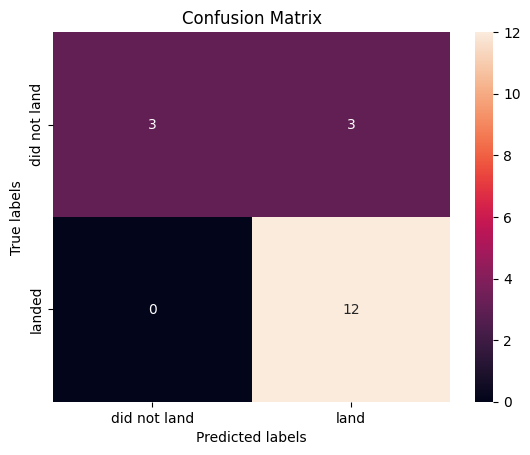

In [37]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [38]:
# Predict on the test data
knn_Y_pred = knn_cv.predict(X_test)

# Calculate the confusion matrix using the matrix2 function
knn_confusion_matrix_result = matrix2(Y_test, knn_Y_pred)

# Print the confusion matrix
print("KNN Confusion Matrix:")
print(knn_confusion_matrix_result)


KNN Confusion Matrix:
[[ 3  3]
 [ 0 12]]


## TASK  12


Find the method performs best:


In [39]:
print("KNN Test accuracy:", knn_test_accuracy)
print("Decision Tree Test accuracy:", tree_test_accuracy)
print("SVM Test accuracy:", svm_test_accuracy)
print("Test accuracy for  Logistic Regression:", test_accuracylg)

KNN Test accuracy: 0.8333333333333334
Decision Tree Test accuracy: 0.8333333333333334
SVM Test accuracy: 0.8333333333333334
Test accuracy for  Logistic Regression: 0.8333333333333334


## All models exactly the same 

In this scenario, where all machine learning models have exactly the same results, we can consider using a Logistic Regression model. Here's why:

    Interpretability: Logistic Regression provides interpretable coefficients for each feature, making it easier to understand how each feature influences the prediction. This can be valuable for explaining the model's decisions to stakeholders or for gaining insights into the factors affecting successful rocket launches.

    Simplicity: Logistic Regression is a simple and straightforward model. It has fewer hyperparameters to tune and is less computationally intensive compared to models like Support Vector Machines (SVM) or K-nearest Neighbors (KNN).

    Efficiency: Logistic Regression tends to be computationally efficient, which can be important when dealing with large datasets or when deploying the model in real-time applications.

    Stability: Since all models perform equally well, stability becomes a key factor. Logistic Regression often exhibits stable performance across different subsets of the data.

While Logistic Regression may not capture complex non-linear relationships in the data as effectively as SVM or decision trees, its simplicity and interpretability can be valuable in certain contexts, especially when the goal is to understand the factors contributing to successful launches.


In [40]:
# A function to display accuracy, recall, precision and F1 score of the model

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


def print_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score: {f1:.2f}")


In [41]:
print('KNN metrics')
KNN = print_metrics(Y_test, knn_Y_pred)
KNN

print('----------------------------------')

print('Decision Tree metrics')
TREE = print_metrics(Y_test, tree_Y_pred)
TREE

print('----------------------------------')

print('SVM metrics')
SVM1 = print_metrics(Y_test, svm_Y_pred)
SVM1

print('----------------------------------')

print('Logistic Regression metrics')
LG1 = print_metrics(Y_test, Y_pred)
LG1


KNN metrics
Accuracy: 0.83
Recall: 1.00
Precision: 0.80
F1 Score: 0.89
----------------------------------
Decision Tree metrics
Accuracy: 0.83
Recall: 1.00
Precision: 0.80
F1 Score: 0.89
----------------------------------
SVM metrics
Accuracy: 0.83
Recall: 1.00
Precision: 0.80
F1 Score: 0.89
----------------------------------
Logistic Regression metrics
Accuracy: 0.83
Recall: 1.00
Precision: 0.80
F1 Score: 0.89


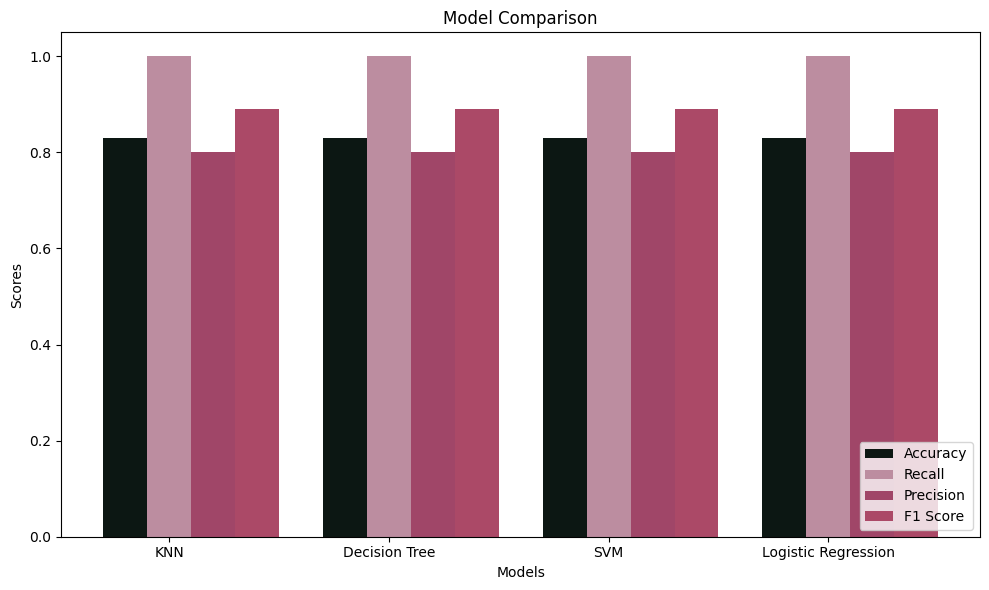

In [46]:


models = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
accuracy = [0.83, 0.83, 0.83, 0.83] 
recall = [1.00, 1.00, 1.00, 1.00]  
precision = [0.80, 0.80, 0.80, 0.80] 
f1_score = [0.89, 0.89, 0.89, 0.89]  

# Create an index for the models
x = np.arange(len(models))

# Define the width of the bars
width = 0.2

# Define custom colors for each metric
colors = ['#0C1713', '#BC8DA0', '#A04668', '#AB4967']

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, accuracy, width, label='Accuracy', color=colors[0])
bar2 = ax.bar(x, recall, width, label='Recall', color=colors[1])
bar3 = ax.bar(x + width, precision, width, label='Precision', color=colors[2])
bar4 = ax.bar(x + 2 * width, f1_score, width, label='F1 Score', color=colors[3])

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='lower right')

# Show the chart
plt.tight_layout()
plt.show()


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
